<a href="https://colab.research.google.com/github/OtavioCarvalho1/Time_Series/blob/main/SHM_ML_Vers%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/OtavioCarvalho1/Time_Series.git

fatal: destination path 'Time_Series' already exists and is not an empty directory.


In [2]:
!pip install statsmodels --upgrade

In [3]:
import numpy as np

from numpy import mean, square, sqrt

import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew

from sklearn.preprocessing import StandardScaler

from math import sqrt

from statsmodels.tsa.ar_model import AutoReg

from statistics import stdev

from sklearn.model_selection import train_test_split

import seaborn as sns

# **Extração de Features**

In [4]:
# função para extração de features dos sinais mas sem colocar ruído

def get_features(arquivo):
    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)
    peak = np.max(df['Amplitude PZT Sensor']) #1 - peak
    mean = df['Amplitude PZT Sensor'].mean() #2 - mean
    ms = np.mean(np.square(df['Amplitude PZT Sensor'])) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = df['Amplitude PZT Sensor'].var() #5 - variance
    std = stdev(df['Amplitude PZT Sensor']) #6 - standard deviation
    skw = skew(df['Amplitude PZT Sensor']) #7 - skewness
    kurt = kurtosis(df['Amplitude PZT Sensor']) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor
    md = pd.DataFrame([[peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f]], columns=['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']) 
    return md

In [5]:
# função que coloca ruído no sinal de 80 dB e extrai as features dele

def get_features_noise_80(arquivo):

    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)

    x_watts = df['Amplitude PZT Sensor']**2
    x_dB = 10 * np.log10(x_watts)
    target_SNR_dB = 80
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_SNR_dB
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    y_volts = df['Amplitude PZT Sensor'] + noise_volts
    noise_data = y_volts

    peak = np.max(noise_data) #1 - peak
    mean = noise_data.mean() #2 - mean
    ms = np.mean(np.square(noise_data)) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = noise_data.var() #5 - variance
    std = stdev(noise_data) #6 - standard deviation
    skw = skew(noise_data) #7 - skewness
    kurt = kurtosis(noise_data) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor

    md = pd.DataFrame([[peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f]], columns=['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']) # esta função retorna um dataframe do pandas com 10 linhas contendo todas as features extraídas
    
    return md

In [6]:
# função que coloca ruído no sinal de 120 dB e extrai as features dele

def get_features_noise_120(arquivo):

    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)

    x_watts = df['Amplitude PZT Sensor']**2
    x_dB = 10 * np.log10(x_watts)
    target_SNR_dB = 120
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_SNR_dB
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    y_volts = df['Amplitude PZT Sensor'] + noise_volts
    noise_data = y_volts

    peak = np.max(noise_data) #1 - peak
    mean = noise_data.mean() #2 - mean
    ms = np.mean(np.square(noise_data)) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = noise_data.var() #5 - variance
    std = stdev(noise_data) #6 - standard deviation
    skw = skew(noise_data) #7 - skewness
    kurt = kurtosis(noise_data) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor

    md = pd.DataFrame([[peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f]], columns=['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']) # esta função retorna um dataframe do pandas com 10 linhas contendo todas as features extraídas
    
    return md

In [7]:
# 100 kHz

sem_dano_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")

dano_1_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_100KHz__5ciclos_B3_A3.csv")

dano_2_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_100KHz__5ciclos_B3_A3.csv")

dano_3_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_100KHz__5ciclos_B3_A3.csv")

dano_4_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_100KHz__5ciclos_B3_A3.csv")


sem_dano_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")

dano_1_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_100KHz__5ciclos_B3_A3.csv")

dano_2_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_100KHz__5ciclos_B3_A3.csv")

dano_3_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_100KHz__5ciclos_B3_A3.csv")

dano_4_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_100KHz__5ciclos_B3_A3.csv")


sem_dano_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")

dano_1_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_100KHz__5ciclos_B3_A3.csv")

dano_2_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_100KHz__5ciclos_B3_A3.csv")

dano_3_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_100KHz__5ciclos_B3_A3.csv")

dano_4_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_100KHz__5ciclos_B3_A3.csv")


df_100 = [sem_dano_100, dano_1_100, dano_2_100, dano_3_100, dano_4_100, 
          sem_dano_100_80dB, dano_1_100_80dB, dano_2_100_80dB, dano_3_100_80dB, dano_4_100_80dB, 
          sem_dano_100_120dB, dano_1_100_120dB, dano_2_100_120dB, dano_3_100_120dB, dano_4_100_120dB]

# 150 kHz

sem_dano_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv")

dano_1_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_150KHz__5ciclos_B3_A3.csv")

dano_2_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_150KHz__5ciclos_B3_A3.csv")

dano_3_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_150KHz__5ciclos_B3_A3.csv")

dano_4_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_150KHz__5ciclos_B3_A3.csv")


sem_dano_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv")

dano_1_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_150KHz__5ciclos_B3_A3.csv")

dano_2_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_150KHz__5ciclos_B3_A3.csv")

dano_3_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_150KHz__5ciclos_B3_A3.csv")

dano_4_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_150KHz__5ciclos_B3_A3.csv")


sem_dano_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv")

dano_1_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_150KHz__5ciclos_B3_A3.csv")

dano_2_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_150KHz__5ciclos_B3_A3.csv")

dano_3_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_150KHz__5ciclos_B3_A3.csv")

dano_4_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_150KHz__5ciclos_B3_A3.csv")

df_150 = [sem_dano_150, dano_1_150, dano_2_150, dano_3_150, dano_4_150, 
          sem_dano_150_80dB, dano_1_150_80dB, dano_2_150_80dB, dano_3_150_80dB, dano_4_150_80dB, 
          sem_dano_150_120dB, dano_1_150_120dB, dano_2_150_120dB, dano_3_150_120dB, dano_4_150_120dB]


# 200 kHz 

sem_dano_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_200KHz__5ciclos_B3_A3.csv")

dano_1_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_200KHz__5ciclos_B3_A3.csv")

dano_2_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_200KHz__5ciclos_B3_A3.csv")

dano_3_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_200KHz__5ciclos_B3_A3.csv")

dano_4_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_200KHz__5ciclos_B3_A3.csv")


sem_dano_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_200KHz__5ciclos_B3_A3.csv")

dano_1_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_200KHz__5ciclos_B3_A3.csv")

dano_2_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_200KHz__5ciclos_B3_A3.csv")

dano_3_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_200KHz__5ciclos_B3_A3.csv")

dano_4_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_200KHz__5ciclos_B3_A3.csv")


sem_dano_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_200KHz__5ciclos_B3_A3.csv")

dano_1_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_200KHz__5ciclos_B3_A3.csv")

dano_2_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_200KHz__5ciclos_B3_A3.csv")

dano_3_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_200KHz__5ciclos_B3_A3.csv")

dano_4_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_200KHz__5ciclos_B3_A3.csv")

df_200 = [sem_dano_200, dano_1_200, dano_2_200, dano_3_200, dano_4_200, 
          sem_dano_200_80dB, dano_1_200_80dB, dano_2_200_80dB, dano_3_200_80dB, dano_4_200_80dB, 
          sem_dano_200_120dB, dano_1_200_120dB, dano_2_200_120dB, dano_3_200_120dB, dano_4_200_120dB]

# 250 kHz

sem_dano_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_250KHz__5ciclos_B3_A3.csv")

dano_1_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_250KHz__5ciclos_B3_A3.csv")

dano_2_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_250KHz__5ciclos_B3_A3.csv")

dano_3_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_250KHz__5ciclos_B3_A3.csv")

dano_4_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_250KHz__5ciclos_B3_A3.csv")


sem_dano_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_250KHz__5ciclos_B3_A3.csv")

dano_1_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_250KHz__5ciclos_B3_A3.csv")

dano_2_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_250KHz__5ciclos_B3_A3.csv")

dano_3_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_250KHz__5ciclos_B3_A3.csv")

dano_4_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_250KHz__5ciclos_B3_A3.csv")


sem_dano_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_250KHz__5ciclos_B3_A3.csv")

dano_1_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_250KHz__5ciclos_B3_A3.csv")

dano_2_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_250KHz__5ciclos_B3_A3.csv")

dano_3_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_250KHz__5ciclos_B3_A3.csv")

dano_4_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_250KHz__5ciclos_B3_A3.csv")

df_250 = [sem_dano_250, dano_1_250, dano_2_250, dano_3_250, dano_4_250, 
          sem_dano_250_80dB, dano_1_250_80dB, dano_2_250_80dB, dano_3_250_80dB, dano_4_250_80dB, 
          sem_dano_250_120dB, dano_1_250_120dB, dano_2_250_120dB, dano_3_250_120dB, dano_4_250_120dB]

# 300 kHz

sem_dano_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")

dano_1_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_300KHz__5ciclos_B3_A3.csv")

dano_2_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_300KHz__5ciclos_B3_A3.csv")

dano_3_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_300KHz__5ciclos_B3_A3.csv")

dano_4_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_300KHz__5ciclos_B3_A3.csv")


sem_dano_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")

dano_1_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_300KHz__5ciclos_B3_A3.csv")

dano_2_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_300KHz__5ciclos_B3_A3.csv")

dano_3_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_300KHz__5ciclos_B3_A3.csv")

dano_4_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_300KHz__5ciclos_B3_A3.csv")


sem_dano_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")

dano_1_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_300KHz__5ciclos_B3_A3.csv")

dano_2_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_300KHz__5ciclos_B3_A3.csv")

dano_3_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_300KHz__5ciclos_B3_A3.csv")

dano_4_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_300KHz__5ciclos_B3_A3.csv")

df_300 = [sem_dano_300, dano_1_300, dano_2_300, dano_3_300, dano_4_300, 
          sem_dano_300_80dB, dano_1_300_80dB, dano_2_300_80dB, dano_3_300_80dB, dano_4_300_80dB, 
          sem_dano_300_120dB, dano_1_300_120dB, dano_2_300_120dB, dano_3_300_120dB, dano_4_300_120dB]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")

,Peak,Mean,Mean²,RMS,Variance,Std Deviation,Skewness,Kurtosis,Crest Factor,K-Factor
0,0.013217,0.000001,0.000005,0.002156,0.000005,0.002156,-0.003725,7.184161,6.13008,0.000028


In [9]:
df = [pd.concat(df_100, ignore_index=True), 
      pd.concat(df_150, ignore_index=True), 
      pd.concat(df_200, ignore_index=True), 
      pd.concat(df_250, ignore_index=True), 
      pd.concat(df_300, ignore_index=True)]

dataset = pd.concat(df, ignore_index=True)

dataset


,Peak,Mean,Mean²,RMS,Variance,Std Deviation,Skewness,Kurtosis,Crest Factor,K-Factor
0,0.013217,1.140910e-06,0.000005,0.002156,0.000005,0.002156,-0.003725,7.184161,6.130080,0.000028
1,0.014850,1.145254e-06,0.000005,0.002207,0.000005,0.002207,-0.003353,9.070766,6.728206,0.000033
2,0.014542,1.364255e-06,0.000005,0.002204,0.000005,0.002204,-0.003578,8.161078,6.598925,0.000032
3,0.014745,1.334253e-06,0.000005,0.002311,0.000005,0.002311,-0.003451,7.951149,6.381176,0.000034
4,0.014802,1.114455e-06,0.000006,0.002400,0.000006,0.002400,-0.003782,8.299823,6.167727,0.000036
...,...,...,...,...,...,...,...,...,...,...
70,0.016768,1.122384e-07,0.000005,0.002193,0.000005,0.002193,0.000028,8.859584,7.647280,0.000037
71,0.023097,2.767526e-08,0.000006,0.002498,0.000006,0.002498,0.000993,15.502414,9.245664,0.000058
72,0.017213,5.053474e-08,0.000005,0.002204,0.000005,0.002204,0.000434,9.672322,7.809434,0.000038
73,0.016947,2.806458e-08,0.000005,0.002165,0.000005,0.002165,0.000148,9.444686,7.827944,0.000037


In [10]:
# criando outputs

estado_estrutural = ['Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                     'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',]

In [11]:
# adicionando os outputs ao dataset

dataset['Condição'] = estado_estrutural

dataset

,Peak,Mean,Mean²,RMS,Variance,Std Deviation,Skewness,Kurtosis,Crest Factor,K-Factor,Condição
0,0.013217,1.140910e-06,0.000005,0.002156,0.000005,0.002156,-0.003725,7.184161,6.130080,0.000028,Sem dano
1,0.014850,1.145254e-06,0.000005,0.002207,0.000005,0.002207,-0.003353,9.070766,6.728206,0.000033,Danificado
2,0.014542,1.364255e-06,0.000005,0.002204,0.000005,0.002204,-0.003578,8.161078,6.598925,0.000032,Danificado
3,0.014745,1.334253e-06,0.000005,0.002311,0.000005,0.002311,-0.003451,7.951149,6.381176,0.000034,Danificado
4,0.014802,1.114455e-06,0.000006,0.002400,0.000006,0.002400,-0.003782,8.299823,6.167727,0.000036,Danificado
...,...,...,...,...,...,...,...,...,...,...,...
70,0.016768,1.122384e-07,0.000005,0.002193,0.000005,0.002193,0.000028,8.859584,7.647280,0.000037,Sem dano
71,0.023097,2.767526e-08,0.000006,0.002498,0.000006,0.002498,0.000993,15.502414,9.245664,0.000058,Danificado
72,0.017213,5.053474e-08,0.000005,0.002204,0.000005,0.002204,0.000434,9.672322,7.809434,0.000038,Danificado
73,0.016947,2.806458e-08,0.000005,0.002165,0.000005,0.002165,0.000148,9.444686,7.827944,0.000037,Danificado


In [12]:
# Separando inputs e outputs

feature_names = ['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']
X = dataset[feature_names]
y = dataset['Condição']

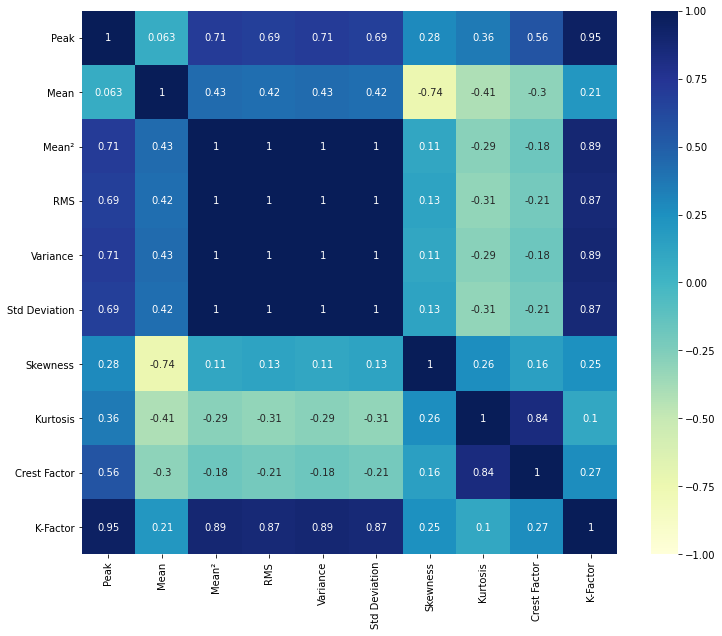

In [13]:
# Correlação entre features

corrMatrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, cmap='YlGnBu')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


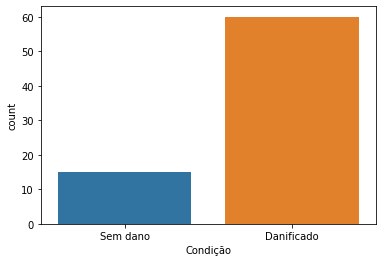

In [14]:
# quantidade de outputs por classe

sns.countplot(y)

In [15]:
# Dividindo dataset para treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(50, 10)
(25, 10)
(50,)


(25,)

In [19]:
# aplicando SVM (sem otimização de parâmetros)

from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.8
